<a href="https://colab.research.google.com/github/chevvakavitha/KNN-Classifier-for-Bowler-classification/blob/main/Copy_of_kNN_Classifier_for_Bowler_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the better bowler in Test Cricket**


In [ ]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get("https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;template=results;type=bowling")
  print(p)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Player','Span','Mat','Inns','Balls','Runs','Wkts','BBI','BBM','Ave','Econ','SR','5','10','']

  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)

  with open("ESPNcricBowltats.csv", 'a') as csvfile:
      # creating a csv writer object
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)


url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;"
url2 = ""
url3 = "template=results;type=bowling"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,36):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=2;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=3;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=4;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=5;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=6;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=7;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=8;template=results;type=bowling
<Response [403]>
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=9;template=results;type=bowling
<Response [403]>
https://stats.espncrici

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read the dataset
data = pd.read_csv("ESPNcricBowltats.csv")
print(data.head())




                   Player       Span  Mat Inns  Balls   Runs Wkts    BBI  \
0  M Muralidaran (ICC/SL)  1992-2010  133  230  44039  18180  800   9/51   
1          SK Warne (AUS)  1992-2007  145  273  40705  17995  708   8/71   
2       JM Anderson (ENG)  2003-2022  176  327  37781  17579  672   7/42   
3          A Kumble (IND)  1990-2008  132  236  40850  18355  619  10/74   
4         SCJ Broad (ENG)  2007-2022  159  293  31982  15720  566   8/15   

      BBM    Ave  Econ    SR   5  10  Unnamed: 14  
0  16/220  22.72  2.47  55.0  67  22          NaN  
1  12/128  25.41  2.65  57.4  37  10          NaN  
2   11/71  26.15  2.79  56.2  32   3          NaN  
3  14/149  29.65  2.69  65.9  35   8          NaN  
4  11/121  27.77  2.94  56.5  19   3          NaN  


In [ ]:
# Preprocess
def discretizeOutput(y):
  for i in range(len(y)):
    if(y[i]<65):
      y[i] = 1
    else:
      y[i] = 0
  return y
"""def preprocessBBI(x1):
  for i in range(len(x1)):
    c=x1[i].split("/")
    x1[i] = int(c[0])/int(c[1])
    return x1
"""
# Separate features and target
y = data["SR"]

discretizeOutput(y)


TypeError: ignored

In [ ]:
data

,Winner,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10,Unnamed: 14
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,1.0,67,22,NaN
1,SK Warne (AUS),1992-2007,145,273,40705,17995,708,8/71,12/128,25.41,2.65,1.0,37,10,NaN
2,JM Anderson (ENG),2003-2022,172,320,37077,17325,657,7/42,11/71,26.36,2.80,1.0,32,3,NaN
3,A Kumble (INDIA),1990-2008,132,236,40850,18355,619,10/74,14/149,29.65,2.69,0.0,35,8,NaN
4,GD McGrath (AUS),1993-2007,124,243,29248,12186,563,8/24,10/27,21.64,2.49,1.0,29,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,J O'Connor (ENG),1929-1930,4,4,162,72,1,1/31,1/31,72.00,2.66,0.0,0,0,NaN
1746,AH Omarshah (ZIM),1992-1996,3,3,186,125,1,1/46,1/82,125.00,4.03,0.0,0,0,NaN
1747,JL Ontong (SA),2002-2004,2,3,185,133,1,1/79,1/123,133.00,4.31,0.0,0,0,NaN
1748,AL Padmore (WI),1976-1976,2,3,474,135,1,1/36,1/134,135.00,1.70,0.0,0,0,NaN


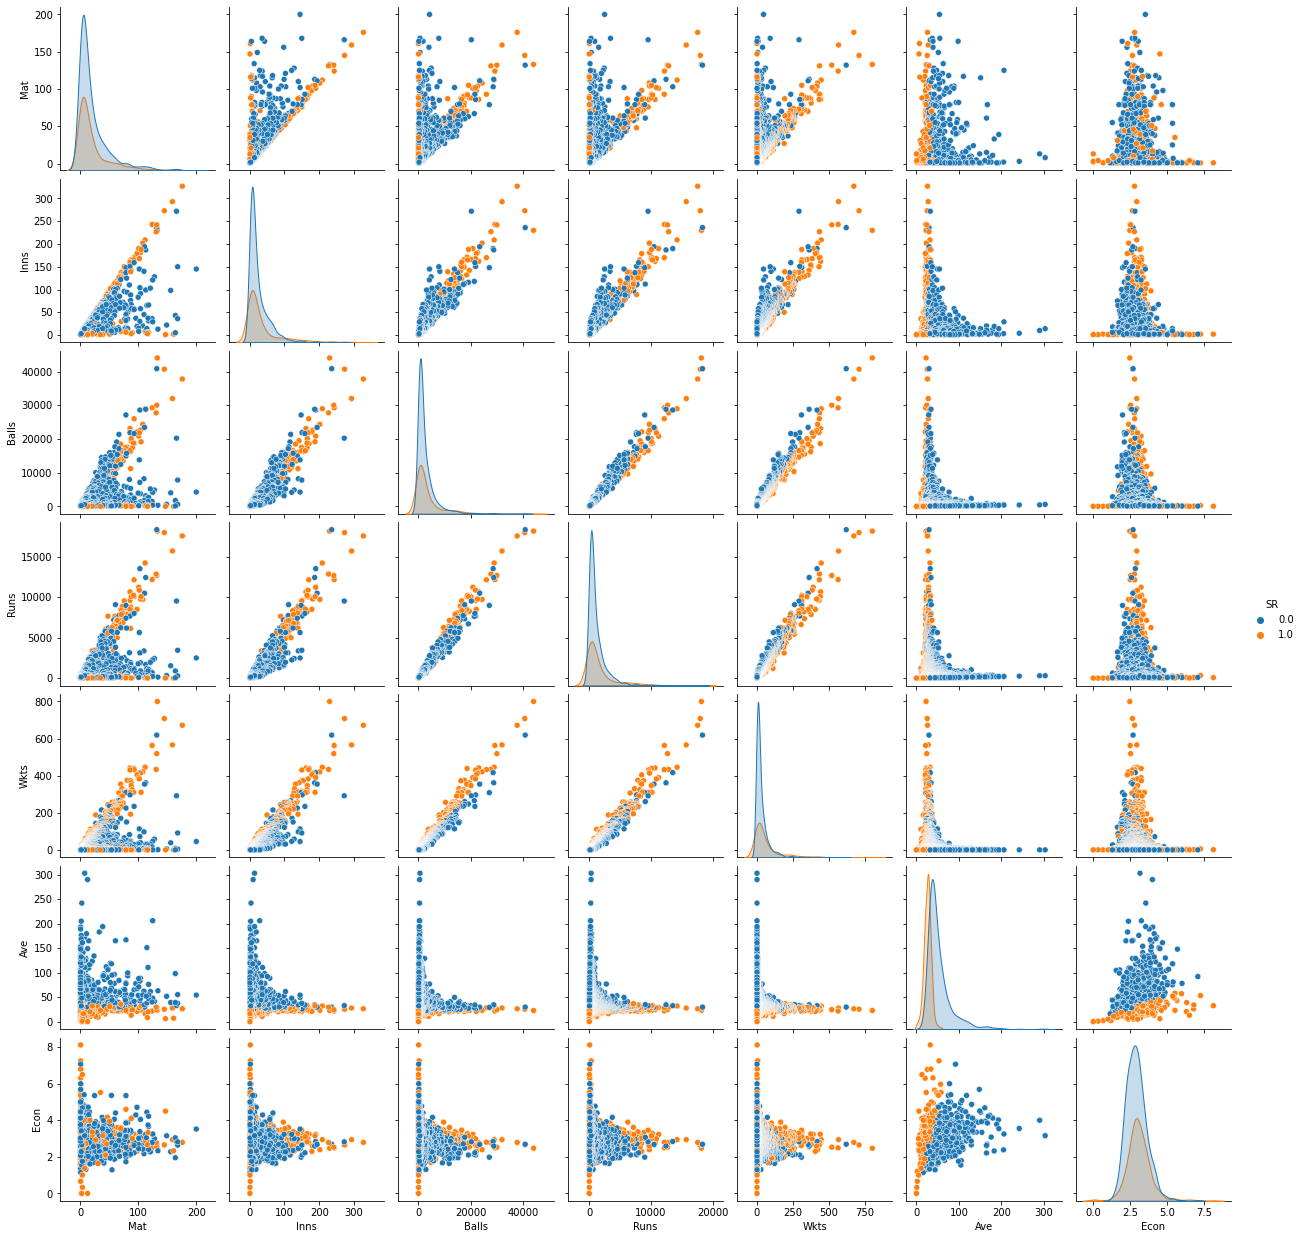

In [ ]:
import seaborn as sns

df = pd.DataFrame(data, columns=data.columns[1:12])
sns.pairplot(df,hue='SR')

**Train - Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Ave','Econ']]
X_train, X_test, y_train, y_test = train_test_split(x,df['SR'],test_size=0.30)

# **k Nearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[343   6]
 [  9 167]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       349
         1.0       0.97      0.95      0.96       176

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
def PrecisionRecallCurve(xtest, y_test, y_pred, classifier):
  average_precision = average_precision_score(y_test, y_pred)
  print('Average precision-recall score: {0:0.2f}'.format(average_precision))
  disp = plot_precision_recall_curve(classifier, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Average precision-recall score: 0.93


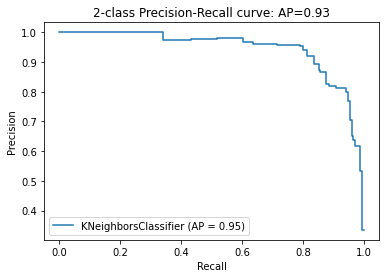

In [ ]:
PrecisionRecallCurve(X_test,y_test,pred,knn)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
error_rate = []

# Will take some time
for i in range(1,42):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

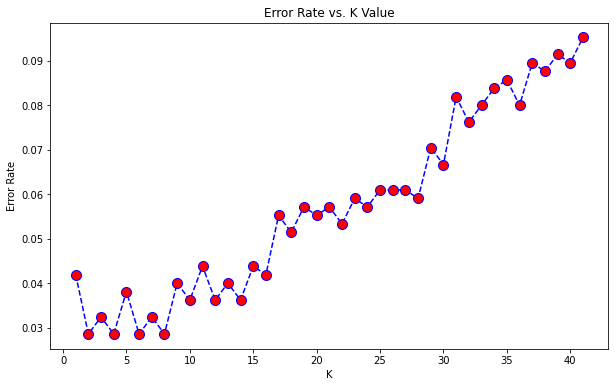

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(range(1,42),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics

Accuracy: 0.9752380952380952


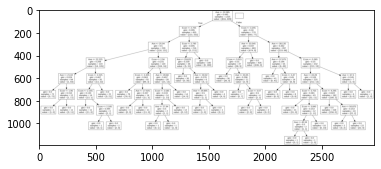

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

ypred = dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

data = tree.export_graphviz(dtree, out_file=None, feature_names=['Ave','Econ'])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree_matresult.png')


img=pltimg.imread('decisiontree_matresult.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
ypred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, ypred))

Accuracy: 0.8


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=13, random_state=0)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

Accuracy: 0.9733333333333334


In [ ]:
# RBF Kernel SVM Classifier
from sklearn.svm import SVC
sv3 = SVC(kernel = "rbf")
sv3.fit(X_train,y_train)

y_pred = sv3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ypred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9733333333333334
[[304  36]
 [ 56 129]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       340
         1.0       0.78      0.70      0.74       185

    accuracy                           0.82       525
   macro avg       0.81      0.80      0.80       525
weighted avg       0.82      0.82      0.82       525

